In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
np_data = np.array(data)
features = np_data[:, :-1]
labels = np_data[:, -1]

# Convert string to float
features[:, 4]  = np.array(features[:, 4] == 'Present', dtype=np.float)

In [5]:
# Preprocess features
processed_features = (features - np.mean(features, axis=0))/(np.max(features, axis=0) - np.min(features, axis=0))

In [6]:
train_features = processed_features[:400, :]
train_labels = labels[:400]
val_features = processed_features[400:, :]
val_labels = labels[400:]
print('Features has shape: ',processed_features.shape, '\nLabels has shape: ', labels.shape)
print('Train features has shape: ',train_features.shape,
      '\nTrain labels has shape: ', train_labels.shape)

Features has shape:  (462, 9) 
Labels has shape:  (462,)
Train features has shape:  (400, 9) 
Train labels has shape:  (400,)


In [7]:
def xentropy(targets, logits):
    out = logits - logits*targets + tf.log(1 + tf.exp(-logits))
    return tf.reduce_mean(out)

Step: 0, Loss: 0.6937486529350281
Step: 1, Loss: 0.6935855746269226
Step: 2, Loss: 0.6933151483535767
Step: 3, Loss: 0.6931213736534119
Step: 4, Loss: 0.6929357051849365
Step: 5, Loss: 0.692714512348175
Step: 6, Loss: 0.6925159096717834
Step: 7, Loss: 0.6922852396965027
Step: 8, Loss: 0.6921020150184631
Step: 9, Loss: 0.6919311881065369
Step: 10, Loss: 0.6917015314102173
Step: 11, Loss: 0.6914949417114258
Step: 12, Loss: 0.6912895441055298
Step: 13, Loss: 0.6911013126373291
Step: 14, Loss: 0.6909037828445435
Step: 15, Loss: 0.6906882524490356
Step: 16, Loss: 0.6905199885368347
Step: 17, Loss: 0.6903326511383057
Step: 18, Loss: 0.690122663974762
Step: 19, Loss: 0.689950704574585
Step: 20, Loss: 0.6897273659706116
Step: 21, Loss: 0.6895699501037598
Step: 22, Loss: 0.6893557906150818
Step: 23, Loss: 0.6891810297966003
Step: 24, Loss: 0.6889896392822266
Step: 25, Loss: 0.6887996196746826
Step: 26, Loss: 0.6886182427406311
Step: 27, Loss: 0.6884485483169556
Step: 28, Loss: 0.688241004943847

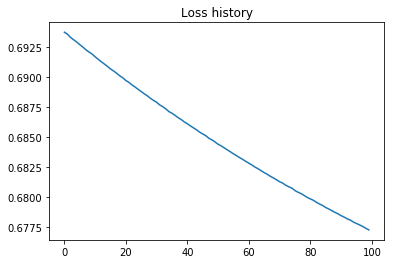

Accuracy: 0.6774193644523621


In [8]:
with tf.Graph().as_default():
    X = tf.placeholder(tf.float32, [None, 9], 'X')
    Y = tf.placeholder(tf.int64, [None,], 'Y')
    
    w = tf.Variable(tf.truncated_normal([9, 1], stddev=0.1), name='weights')
    b = tf.Variable(tf.zeros([]), name='bias')
    
    logits = tf.matmul(X, w) + b
    loss = xentropy(tf.cast(Y, tf.float32), logits)
    
    train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    #Define accuracy
    predictions = tf.sigmoid(logits) > 0.5
    acc, acc_op = tf.metrics.accuracy(Y, predictions)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        
        loss_history=[]
        for i in range(100):
            _, np_loss = sess.run([train_op, loss],
                                  feed_dict={X:train_features, Y:train_labels})
            print('Step: {}, Loss: {}'.format(i, np_loss))
            loss_history.append(np_loss)
            
        plt.plot(loss_history)
        plt.title('Loss history')
        plt.show()
        
        # Test model
        np_acc,np_predictions = sess.run([acc_op, predictions],
                            feed_dict={X:val_features, Y:val_labels})
        if np.sum(np_predictions) == 0:
            print('No predictions is True')
        print('Accuracy: {}'.format(np_acc))
            